# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()

720

In [4]:
#  2. Modify our df to have all duplicate rows removed. 

print("shape before drop_duplicates:",df.shape)
df=df.drop_duplicates()
print("shape after drop_duplicates:",df.shape)

shape before drop_duplicates: (11914, 15)
shape after drop_duplicates: (11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [7]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum().sort_values(ascending=False)

Engine HP            69
Engine Cylinders     30
Number of Doors       6
Engine Fuel Type      3
MSRP                  0
Popularity            0
city mpg              0
highway MPG           0
Vehicle Style         0
Vehicle Size          0
Driven_Wheels         0
Transmission Type     0
Year                  0
Model                 0
Make                  0
dtype: int64

In [14]:
# * Print how long our dataframe is.

df.shape

(11092, 15)

In [8]:
# * Remove any row that has a null value in it. 

df=df.dropna()

In [9]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape


(11092, 15)

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:ylabel='Make'>

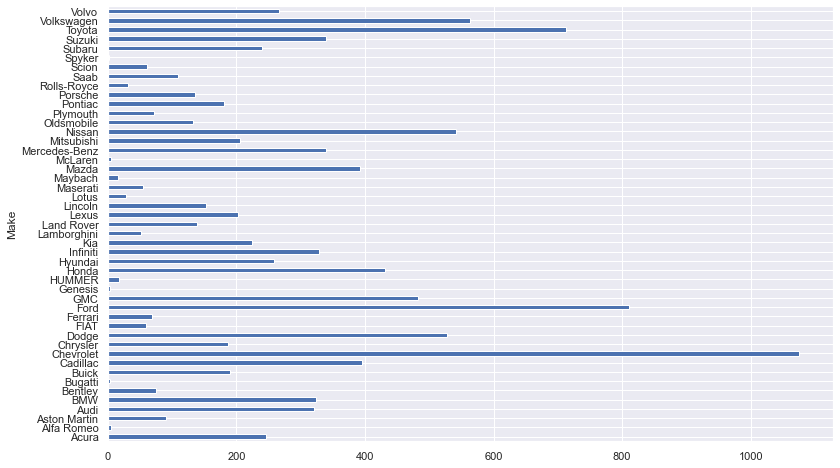

In [10]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

gb=df.groupby('Make')
brand_count=gb['Make'].count()
brand_count.plot(kind='barh',figsize=(13,8))


# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:ylabel='Make'>

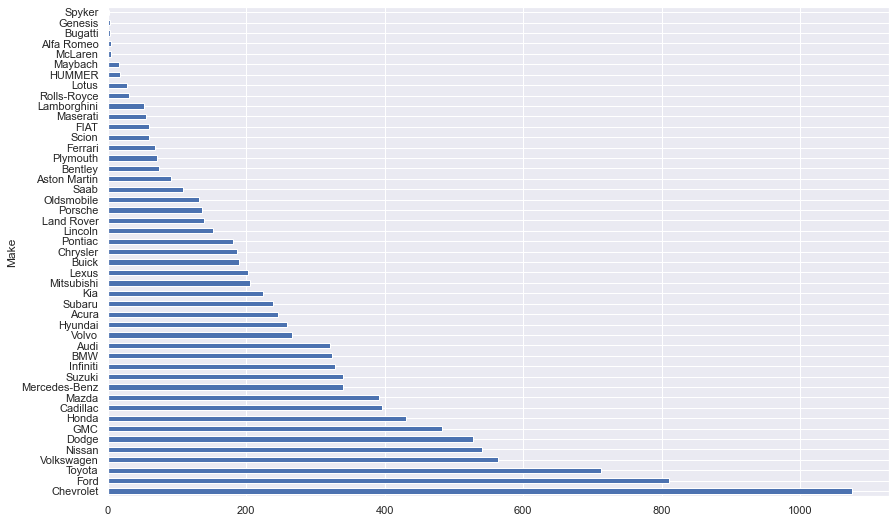

In [12]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

brand_count=brand_count.sort_values(ascending=False)
brand_count.plot(kind='barh',figsize=(14,9))

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:xlabel='Year'>

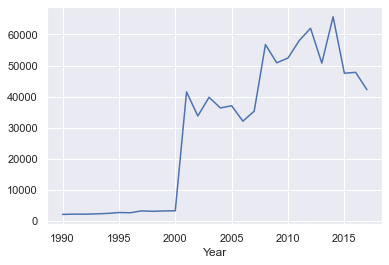

In [16]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb_year=df.groupby('Year')
avg_price_YOY=gb_year['MSRP'].mean()
avg_price_YOY.plot(kind='line',x='Year',y='MSRP')

In [17]:
avg_price_YOY

Year
1990     2032.272727
1991     2120.196078
1992     2108.346457
1993     2211.496855
1994     2349.328125
1995     2647.206897
1996     2566.565217
1997     3164.644578
1998     3036.151724
1999     3153.850877
2000     3197.104348
2001    41500.666667
2002    33744.156098
2003    39774.063025
2004    36333.306034
2005    37029.951691
2006    32074.850515
2007    35278.404192
2008    56753.838509
2009    50876.837079
2010    52418.782609
2011    58060.146953
2012    61993.874286
2013    50770.798137
2014    65710.961397
2015    47506.750244
2016    47799.916098
2017    42224.902804
Name: MSRP, dtype: float64

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [8]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price adjuster']=np.where(df['Year']<=2000,10,1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price']=df['price adjuster']*df['MSRP']


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:xlabel='Year'>

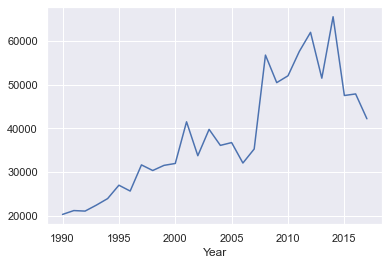

In [9]:
# Plot new prices
gb_years_new=df.groupby('Year')
avg_p_new=gb_years_new['adjusted_price'].mean()
avg_p_new.plot(kind='line',x='Year',y='adjusted_price')

# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [11]:
# What are the top 5 car makers make the most expensive cars on average. 
gp_5cars=df.groupby('Make')
gp_5cars['adjusted_price'].mean().round().sort_values(ascending=False).head()

Make
Bugatti        1757224.0
Maybach         546222.0
Rolls-Royce     351131.0
Lamborghini     331567.0
Bentley         247169.0
Name: adjusted_price, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [12]:
# Which car makers have the highest median highway MPG?
gp_5cars['highway MPG'].median().sort_values(ascending=False).head()


Make
Tesla         100
Alfa Romeo     34
FIAT           33
Volkswagen     32
Scion          32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

<AxesSubplot:xlabel='adjusted_price', ylabel='Count'>

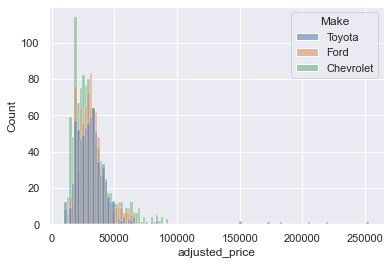

In [13]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
cd1=df['Make']=="Ford"
cd2=df['Make']=="Toyota"
cd3=df['Make']=="Chevrolet"
temp_df=df[cd1 | cd2 | cd3]

sns.histplot(data=temp_df,x='adjusted_price',hue='Make')


# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

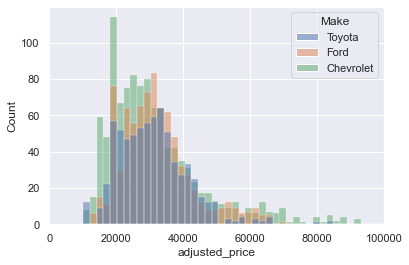

In [14]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000
ax=sns.histplot(data=temp_df,x='adjusted_price',hue='Make')
ax.set_xlim(0, 100000)

# Plot the relationship between Engine HP and highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

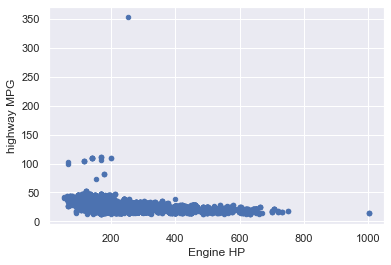

In [15]:
# Plot the relationship between Engine HP and highway MPG
df.plot(kind='scatter',x='Engine HP',y='highway MPG')

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

<AxesSubplot:xlabel='Engine HP'>

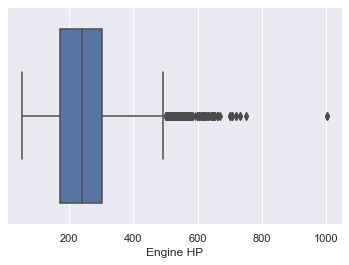

In [16]:
# create a boxplot for the 'Engine HP'
sns.boxplot(data=df,x='Engine HP')

# Make another boxplot for highway MPG

<AxesSubplot:xlabel='highway MPG'>

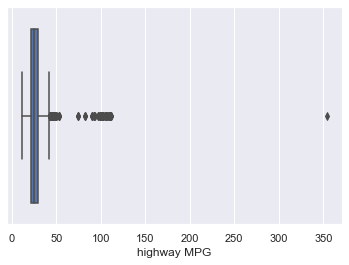

In [17]:
# create a boxplot for the 'highway MPG'
sns.boxplot(data=df,x='highway MPG')

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [18]:
# Remove any  outliers from Engine HP and highway MPG 

#Calculate the 0.25 and 0.75 Quantiles
q1_HP=df['Engine HP'].quantile(0.25)
q1_MPG=df['highway MPG'].quantile(0.25)

q3_HP=df['Engine HP'].quantile(0.75)
q3_MPG=df['highway MPG'].quantile(0.75)

#Calculate the Inter Quartile Range (IQR)
IQR_HP=q3_HP-q1_HP
IQR_MPG=q3_MPG-q1_MPG

In [19]:
outliers_below_HP=df['Engine HP']<(q1_HP-1.5*IQR_HP)
outliers_above_HP=df['Engine HP']>(q3_HP+1.5*IQR_HP)

outliers_below_MPG=df['highway MPG']<(q1_MPG-1.5*IQR_MPG)
outliers_above_MPG=df['highway MPG']>(q3_MPG+1.5*IQR_MPG)

df=df[~(outliers_below_HP | outliers_above_HP | outliers_below_MPG |outliers_above_MPG)]

In [20]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,price adjuster,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,1,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,1,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,1,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,1,50920


# Remake the boxplots for both Engine HP and highway MPG


<AxesSubplot:xlabel='Engine HP'>

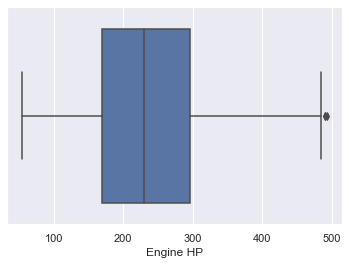

In [21]:
# Engine HP boxplot
sns.boxplot(data=df,x='Engine HP')

<AxesSubplot:xlabel='highway MPG'>

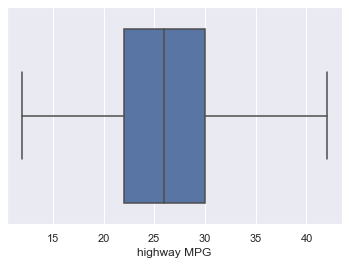

In [22]:
# highway MPG boxplot

sns.boxplot(data=df,x='highway MPG')

# Make a scatter plot of Engine HP vs highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Engine HP', ylabel='highway MPG'>

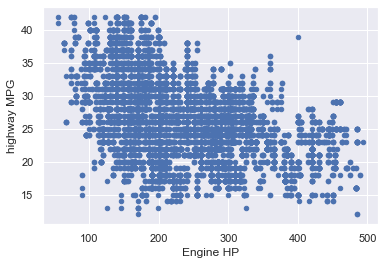

In [23]:
# Make a scatter plot of Engine HP vs highway MPG
df.plot(kind='scatter',x='Engine HP',y='highway MPG')

# What does this plot tell you about how Engine HP affects highway MPG?

In [70]:
# What does this plot tell you about how Engine HP affects highway MPG?
# df.corr()
print("higher HP, lower highway MPG(not a string correlation)")

higher HP, lower highway MPG(not a string correlation)


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

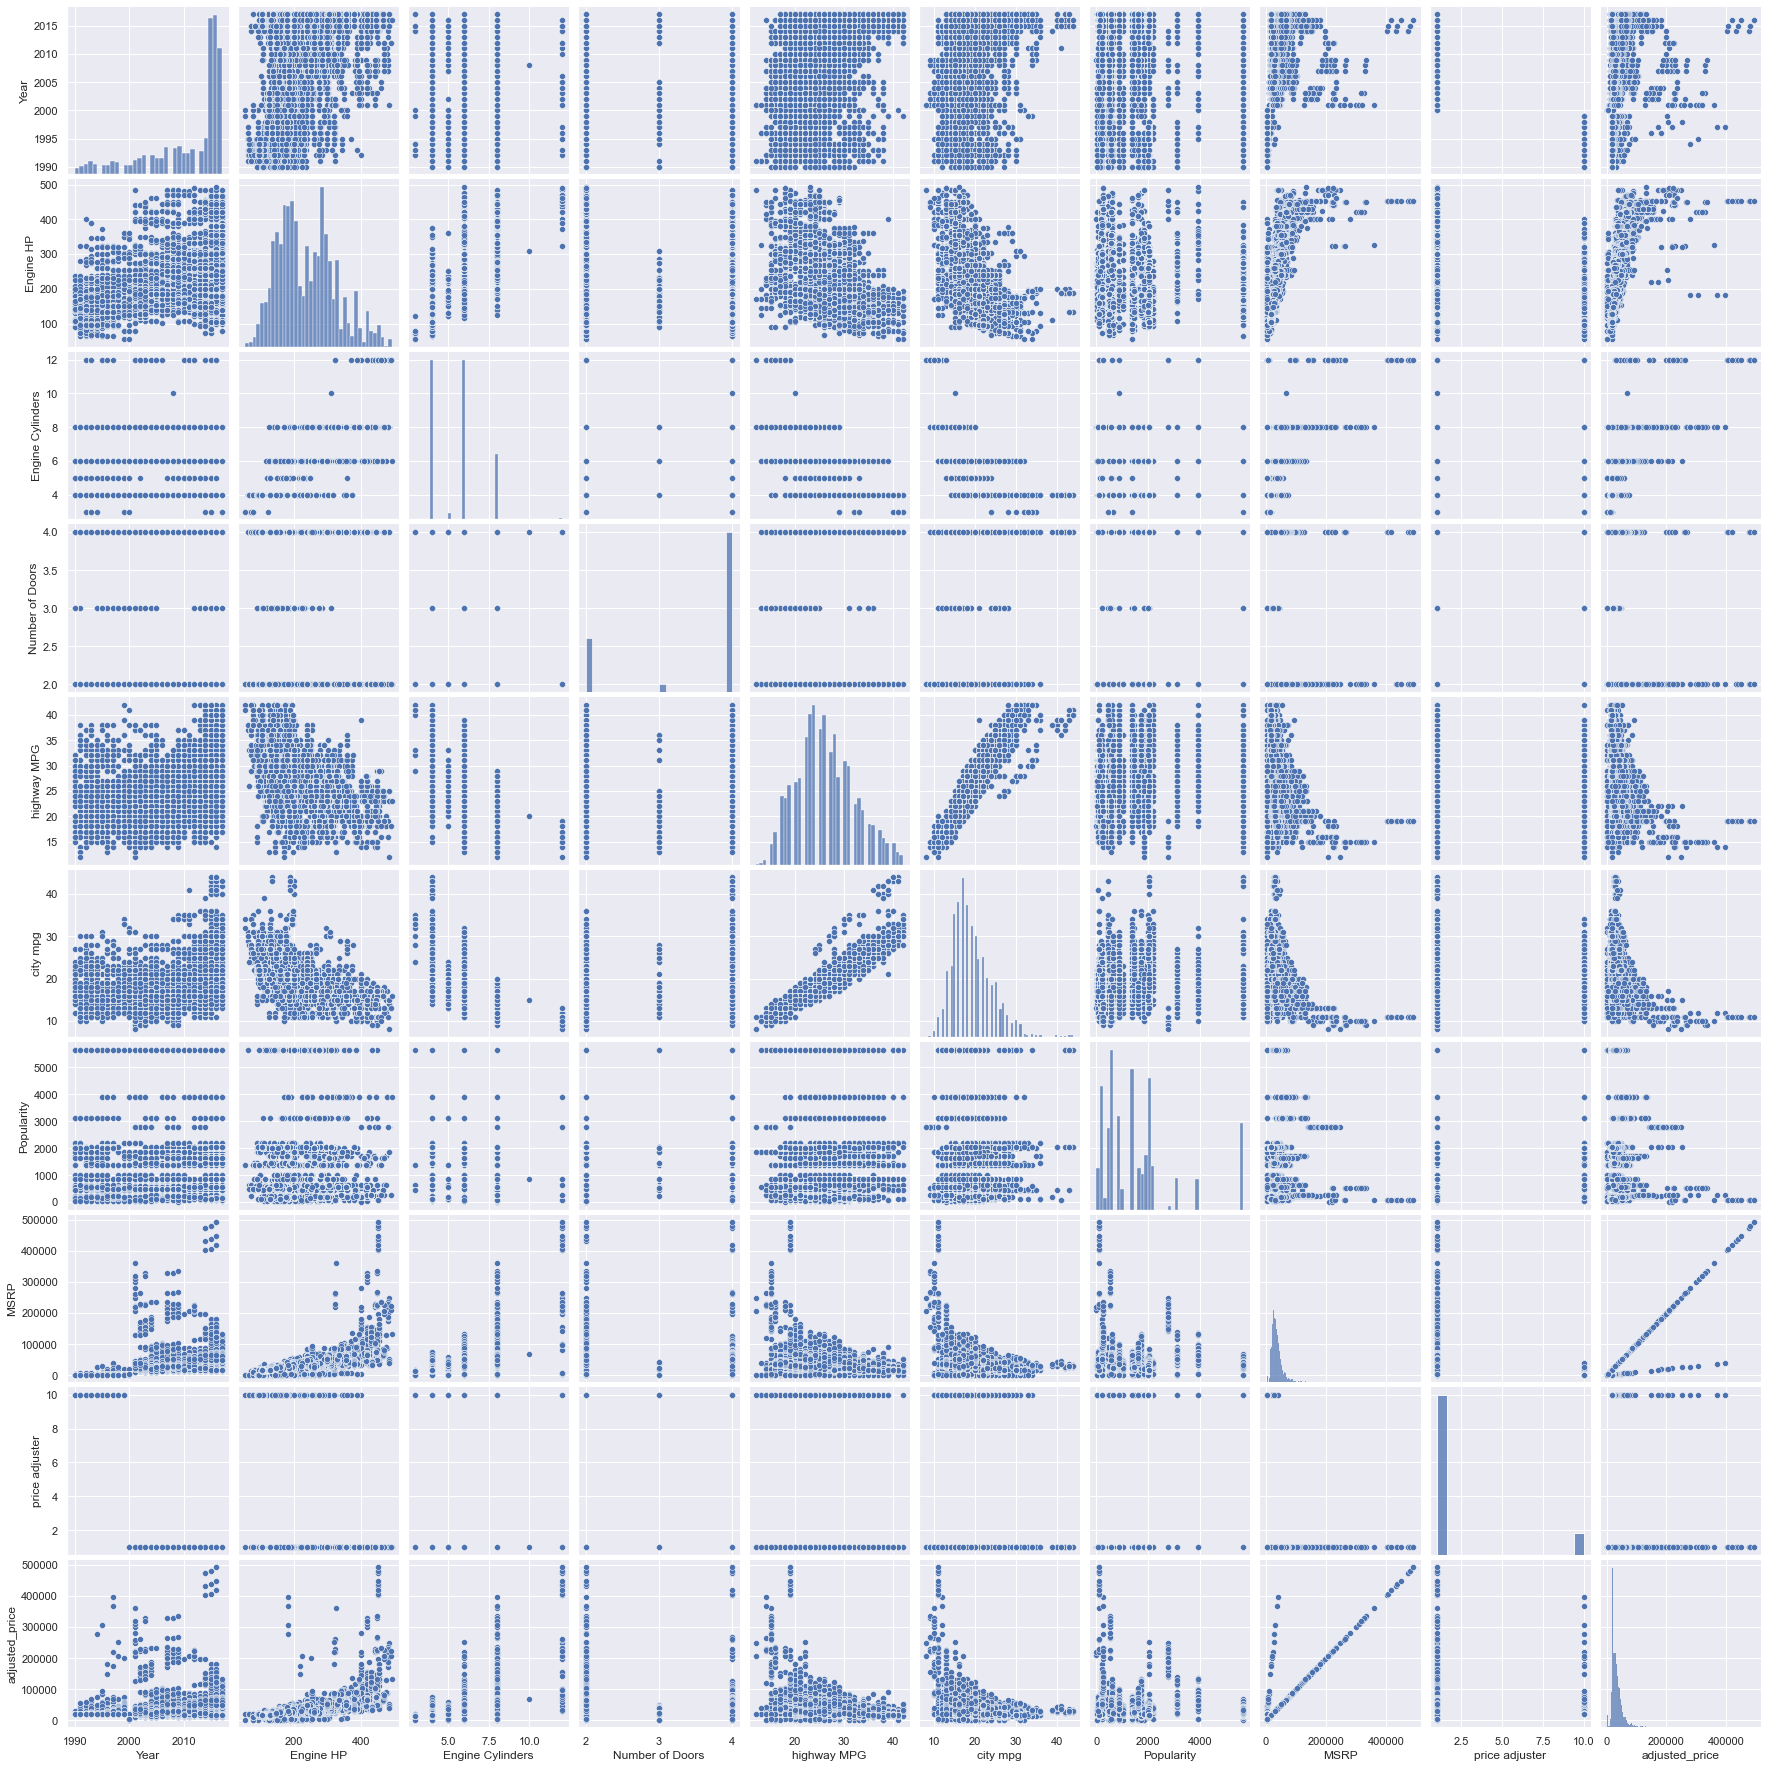

In [72]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)


In [24]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print("highway MPG and city MPG has a strong positive correlation")

highway MPG and city MPG has a strong positive correlation


In [73]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,price adjuster,adjusted_price
Year,1.000000,0.376037,-0.069852,0.270154,0.332249,0.282143,0.090952,0.371899,-0.784020,0.185066
Engine HP,0.376037,1.000000,0.734636,-0.001118,-0.462145,-0.536820,0.082125,0.653392,-0.301540,0.610417
Engine Cylinders,-0.069852,0.734636,1.000000,-0.051443,-0.705137,-0.726298,0.089728,0.443390,0.003197,0.476986
Number of Doors,0.270154,-0.001118,-0.051443,1.000000,0.077427,0.096369,-0.065298,-0.030641,-0.255312,-0.112278
highway MPG,0.332249,-0.462145,-0.705137,0.077427,1.000000,0.919652,-0.062250,-0.184340,-0.183631,-0.252391
city mpg,0.282143,-0.536820,-0.726298,0.096369,0.919652,1.000000,-0.043116,-0.233893,-0.148020,-0.292233
Popularity,0.090952,0.082125,0.089728,-0.065298,-0.062250,-0.043116,1.000000,-0.006614,-0.005423,-0.004831
MSRP,0.371899,0.653392,0.443390,-0.030641,-0.184340,-0.233893,-0.006614,1.000000,-0.384399,0.936721
price adjuster,-0.784020,-0.301540,0.003197,-0.255312,-0.183631,-0.148020,-0.005423,-0.384399,1.000000,-0.136399
adjusted_price,0.185066,0.610417,0.476986,-0.112278,-0.252391,-0.292233,-0.004831,0.936721,-0.136399,1.000000


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

<AxesSubplot:>

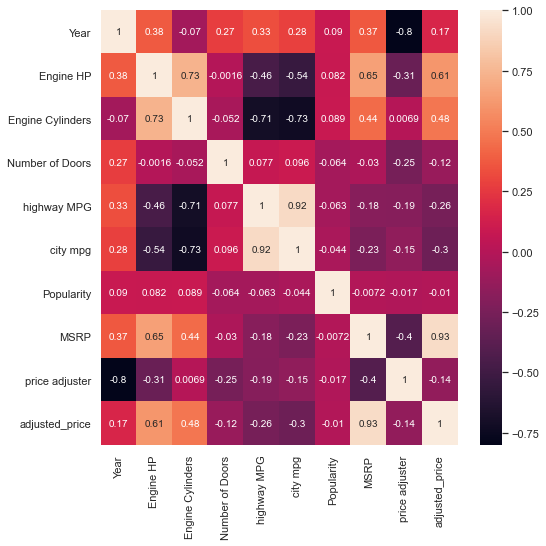

In [26]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

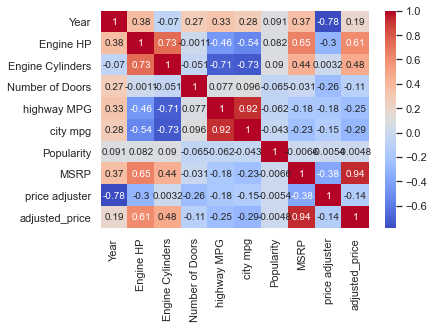

In [76]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [33]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('highway MPG and city MPG has the strongest positive correlation b/c they are kind of interchangeable')

Your answer here


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [87]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

strings_new=[]
for i in df.columns:
    j=i.replace(' ', '_')
    strings_new.append(j.lower())
print(strings_new)
    

['make', 'model', 'year', 'engine_fuel_type', 'engine_hp', 'engine_cylinders', 'transmission_type', 'driven_wheels', 'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'price_adjuster', 'adjusted_price']


In [88]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'price adjuster', 'adjusted_price'],
      dtype='object')

In [89]:
df.columns=strings_new
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,price_adjuster,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,1,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,1,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,1,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,1,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,1,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,1,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,1,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,1,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,1,50920
